In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import sys
sys.path.append('../')

from cossif_library import CosSIF
from plot_umap import UMAP2D

In [3]:
# dataset path
ds_path = os.path.abspath('../../datasets/ISIC-2016')
cls_benign = os.path.join(ds_path, 'split/train/benign')
cls_malignant = os.path.join(ds_path, 'split/train/malignant')

# filter path
save_path = os.getcwd().replace(os.sep, '/')

# benign filter path
cls_benign_filtered = os.path.join(ds_path, 'algorithm_demo/filtered/benign_filtered')
cls_benign_removed = os.path.join(ds_path, 'algorithm_demo/removed/benign_removed')

# malignant filter path
cls_malignant_filtered = os.path.join(ds_path, 'algorithm_demo/filtered/malignant_filtered')
cls_malignant_removed = os.path.join(ds_path, 'algorithm_demo/removed/malignant_removed')

## CosSIF

In [4]:
cossif = CosSIF()

In [5]:
cossif.calculate_and_filter(
    target_path = cls_benign,
    secondary_path = cls_malignant,
    filtered_path=cls_benign_filtered,
    removed_path=cls_benign_removed,
    record_save_path = save_path,
    record_keep=False,
    file_name = 't_benign_x_s_malignant',
    filter_type = 'dissimilar',
    filter_range = 0.85,
)

+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|    benign    |   727   |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|        malignant        |   173   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 747.48it/s]


Resizing images of the secondary class/classes...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 743.84it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:47<00:00, 15.38it/s]


+--------------+-----------------+----------------+-------------------+------------+
| Total Images | Filtered Images | Removed Images |  Threshold Score  |   Order    |
+--------------+-----------------+----------------+-------------------+------------+
|     727      |       618       |      109       | 0.979840028571163 | Dissimilar |
+--------------+-----------------+----------------+-------------------+------------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:02<00:00, 302.33it/s]


In [6]:
cossif.calculate_and_filter(
    target_path = cls_malignant,
    secondary_path = cls_benign,
    filtered_path=cls_malignant_filtered,
    removed_path=cls_malignant_removed,
    record_save_path = save_path,
    record_keep=False,
    file_name = 't_malignant_x_s_benign',
    filter_type = 'similar',
    filter_range = 0.85,
)

+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|  malignant   |   173   |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|          benign         |   727   |
+-------------------------+---------+
Resizing images of the target class...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 697.24it/s]


Resizing images of the secondary class/classes...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 728.78it/s]


Calculating Similarities...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:49<00:00,  3.52it/s]


+--------------+-----------------+----------------+--------------------+---------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |  Order  |
+--------------+-----------------+----------------+--------------------+---------+
|     173      |       148       |       25       | 0.9950174286971352 | Similar |
+--------------+-----------------+----------------+--------------------+---------+


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 323.15it/s]


## Plot Images

In [7]:
def plot_images(image_dir, num_rows=4, num_cols=20, plot_title=None):

    # Get a list of image filenames in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".png")]

    # Set up the grid
    num_images = len(image_files)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
    axs = axs.flatten()

    # Loop through image files and plot them
    for i in range(min(num_images, num_rows * num_cols)):
        img = mpimg.imread(os.path.join(image_dir, image_files[i]))
        axs[i].imshow(img)
        axs[i].axis('off')

    # Remove any unused subplots if the number of images is less than num_rows * num_cols
    for i in range(num_images, num_rows * num_cols):
        axs[i].axis('off')
    
    # Set user-defined title
    if plot_title is not None:
        plt.suptitle(plot_title, fontsize=25)  # Set user-defined plot title
    
    plt.tight_layout()
    plt.show()

### Benign

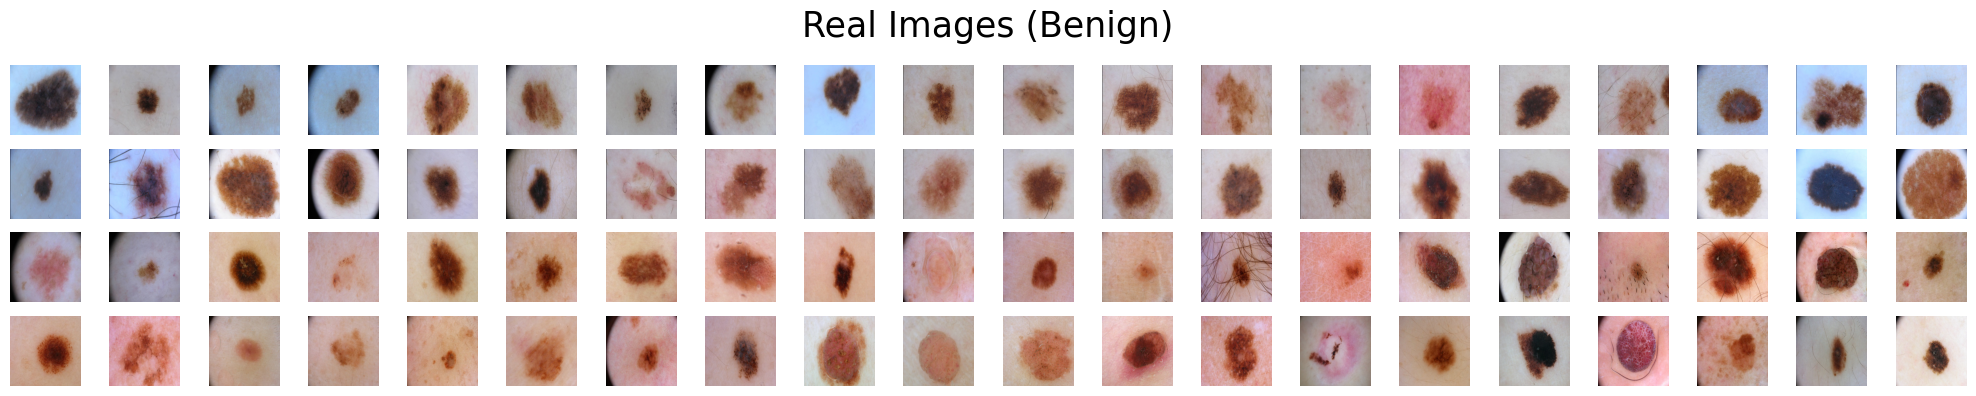

In [8]:
plot_images(
    image_dir=os.path.join(ds_path, 'split/train/benign'),
    plot_title='Real Images (Benign)'
)

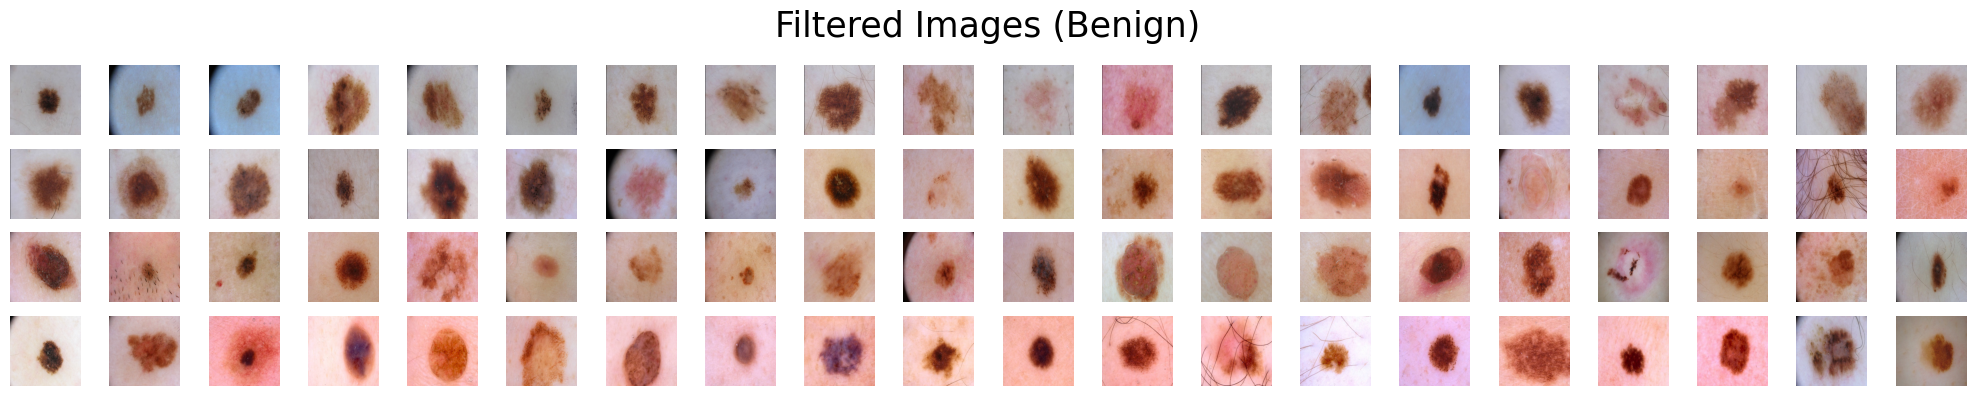

In [9]:
plot_images(
    image_dir=os.path.join(ds_path, 'algorithm_demo/filtered/benign_filtered'),
    plot_title='Filtered Images (Benign)'
)

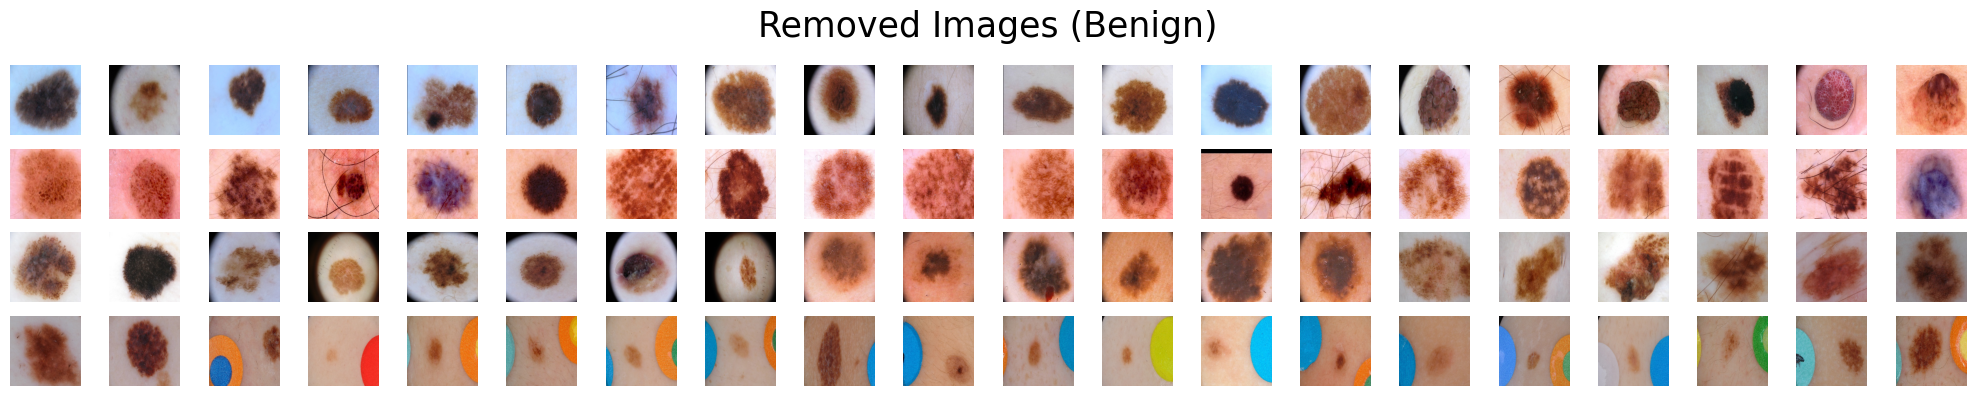

In [10]:
plot_images(
    image_dir=os.path.join(ds_path, 'algorithm_demo/removed/benign_removed'),
    plot_title='Removed Images (Benign)'
)

### Malignant

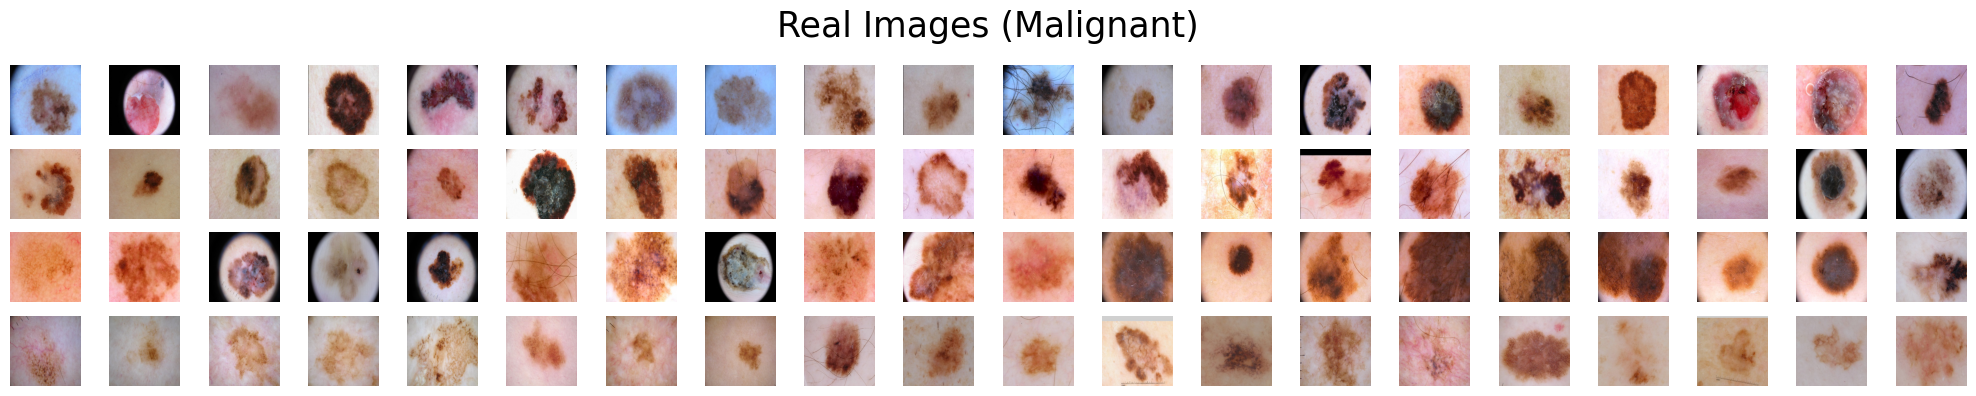

In [11]:
plot_images(
    image_dir=os.path.join(ds_path, 'split/train/malignant'),
    plot_title='Real Images (Malignant)'
)

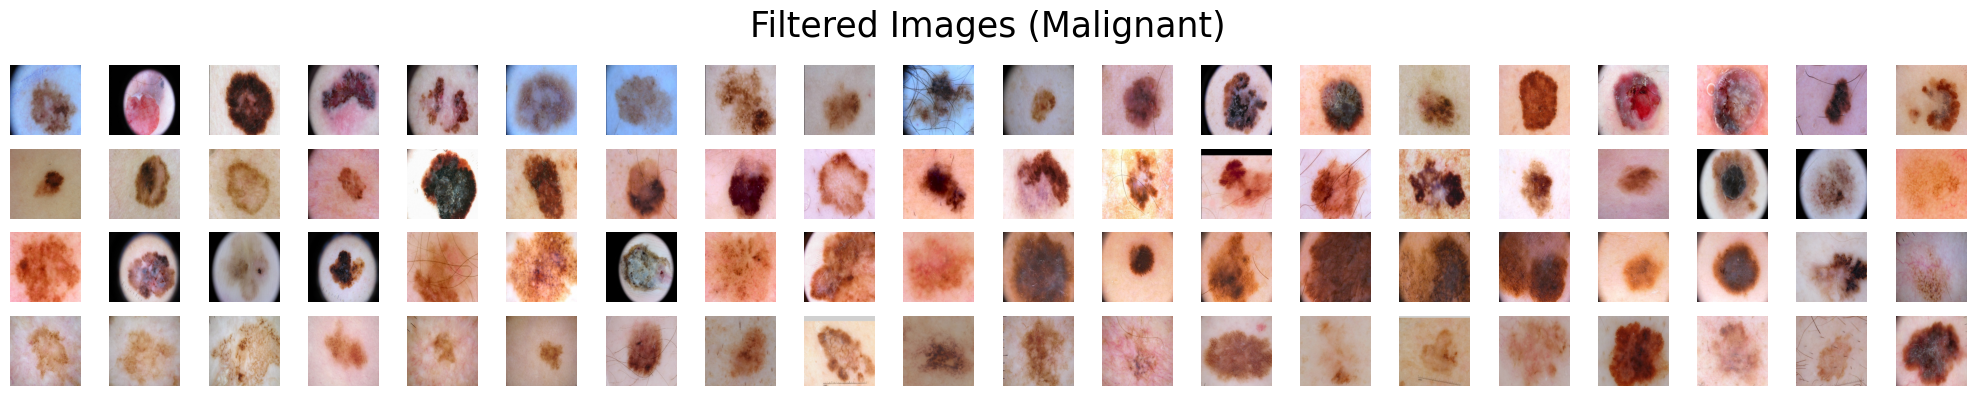

In [12]:
plot_images(
    image_dir=os.path.join(ds_path, 'algorithm_demo/filtered/malignant_filtered'),
    plot_title='Filtered Images (Malignant)'
)

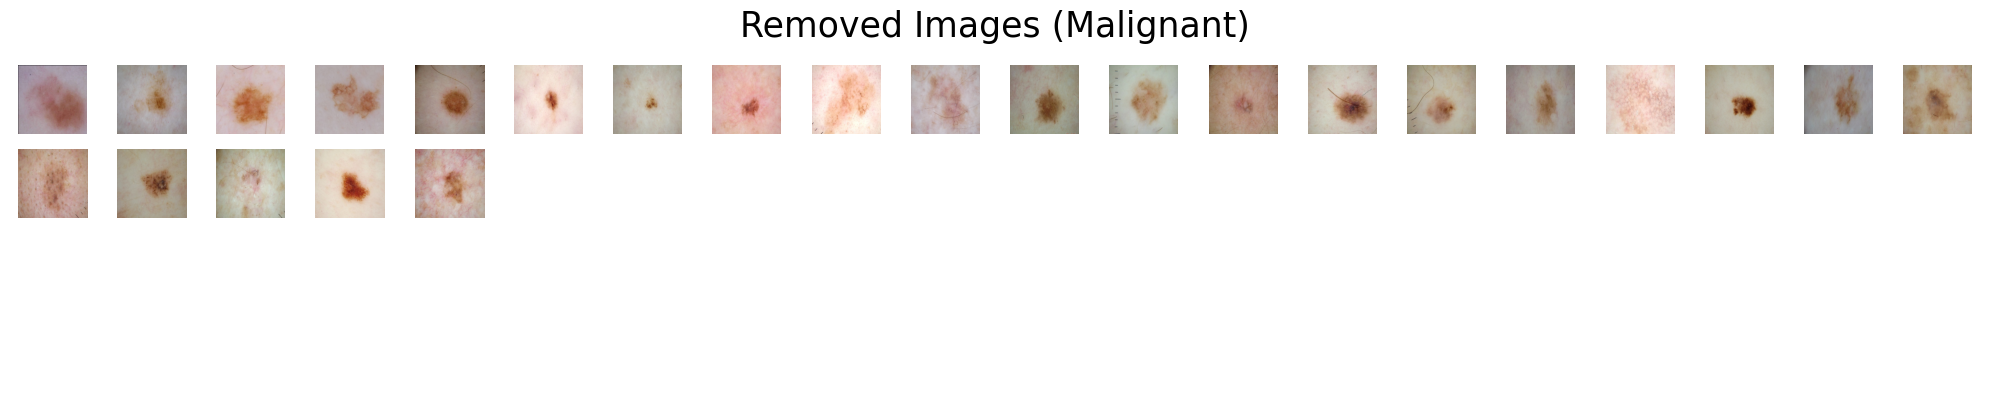

In [13]:
plot_images(
    image_dir=os.path.join(ds_path, 'algorithm_demo/removed/malignant_removed'),
    plot_title='Removed Images (Malignant)'
)